In [4]:
pip install numpy scipy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 7.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 6.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 6.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.5 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import all our necessary libraries
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ','.
# Your data should have five columns - elapsed time, ultrasonic sensor distance, acceleration in x direction, acceleration in y direction, acceleration in z direction
read_in_array1 = np.loadtxt('Trial 1.txt', delimiter=',')
read_in_array2 = np.loadtxt('Trial 2.txt', delimiter=',')
read_in_array3 = np.loadtxt('Trial 3.txt', delimiter=',')
read_in_array4 = np.loadtxt('Trial 4.txt', delimiter=',')
read_in_array5 = np.loadtxt('Trial 5.txt', delimiter=',')
read_in_array6 = np.loadtxt('Trial 6.txt', delimiter=',')
read_in_array7 = np.loadtxt('Trial 7.txt', delimiter=',')
print("hello")
print("hello2")
print("aidan was here! ! ! ! ! !cookie ")

hello


In [7]:
#measured angle = 8.24 degrees
#g = 9.81

In [8]:
#We can calculate theoretical acceleration with gsintheta
# m = 0.613 kg

In [ ]:
# Take all of the elements in the 0th column to create your x-axis array
time = read_in_array1[:,0]

# Elapsed time is typically always going to be the x-axis
# We are converting it from units of ms to s.
elapsed_time = (time-time[0]) / 1000.

# We create an array to store the acceleration in x - the axis along which simple harmonic motion takes place
acc_data_unrefined = read_in_array1[:,2]

# We define our calibration function from calibrating our accelerometer (we need to input the slope and intercept here)
def output_to_accel_x(output):
  accel = -.000668098522*output + 4.00245820
  return accel

def output_to_accel_y(output):
  accel = output*-0.0060398+0.13212437
  return accel
acc_data = output_to_accel_x(acc_data_unrefined) - 9.81

def output_to_accel_z(output):
  accel = output*-.0000000402112828+ .000962094461
  return accel




Text(0.5, 0, 'Time (s)')

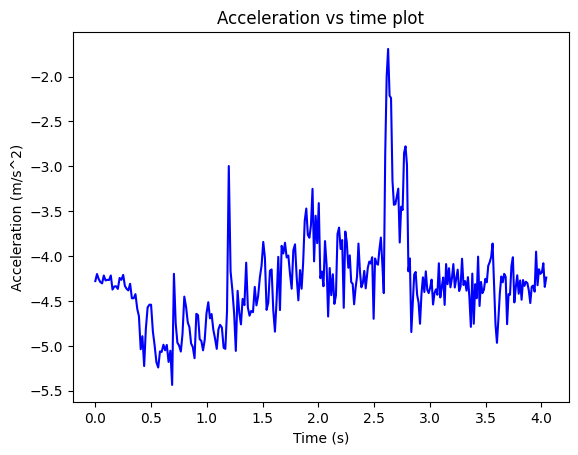

In [10]:
#start_time = 150
#stop_time = 400

elapsed_time_window = elapsed_time
acc_data_window = acc_data

#plt.scatter(elapsed_time_window,acc_data_window,color="blue")
plt.plot(elapsed_time,acc_data_window,color="blue")

# Provide a title to the plot
plt.title('Acceleration vs time plot')
# Label the y-axis
plt.ylabel('Acceleration (m/s^2)')
# Label the x-axis
plt.xlabel('Time (s)')